In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import networkx as nx
from networkx.algorithms import community

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('~/Downloads/OnlineLearning_2.csv')

In [6]:
df.set_index(df['user_id'])

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,stripped_text
user_id,,,,,,,,,,,,,,,,,,,,,
40054452,40054452,1246241329623060480,2020-04-04T01:01:01Z,PearsonNorthAm,Discover easy digital tools and tactics you ca...,Sprinklr,175,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Discover easy digital tools and tactics you ca...
40054452,40054452,1245472011398324236,2020-04-01T22:04:01Z,PearsonNorthAm,Reducing cognitive load can help students lear...,Sprinklr,220,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Reducing cognitive load can help students lear...
40054452,40054452,1245715612686520321,2020-04-02T14:12:00Z,PearsonNorthAm,Do you need to move your course online as soon...,Sprinklr,270,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Do you need to move your course online as soon...
40054452,40054452,1244946292809351175,2020-03-31T11:15:00Z,PearsonNorthAm,Caring for a student learning at home? @Connec...,Sprinklr,184,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Caring for a student learning at home? @Connec...
40054452,40054452,1245397264996143105,2020-04-01T17:07:00Z,PearsonNorthAm,10 ways to engage &amp; instruct students remo...,Sprinklr,159,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,10 ways to engage &; instruct students remotel...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212517393,1212517393,1243508162185101312,2020-03-27T12:00:23Z,CoFinnegan,"When I arrived for a visit three months ago, I...",Twitter for iPhone,277,NaN,NaN,NaN,...,1923,2013-02-23T15:41:21Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12125173...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7319444661...,"When I arrived for a visit three months ago, I..."
854268772819103744,854268772819103744,1243508064235524096,2020-03-27T12:00:00Z,WildTeamUK,We've added a new online workshop! Project Man...,TweetDeck,279,NaN,NaN,NaN,...,2413,2017-04-18T09:42:01Z,False,https://t.co/FNoQyblVJc,http://www.wildteam.org.uk,NaN,https://pbs.twimg.com/profile_banners/85426877...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8934221595...,We've added a new online workshop! Project Man...
702571009,702571009,1243507578992279552,2020-03-27T11:58:04Z,mallackw,@AudraKaplan Here is the @Screencastify tutori...,Twitter for iPhone,139,NaN,15100514.0,AudraKaplan,...,1404,2012-07-18T07:23:23Z,False,https://t.co/baWuGY6aHl,http://www.edtechnologyspecialists.com,NaN,https://pbs.twimg.com/profile_banners/70257100...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7639125499...,@AudraKaplan Here is the @Screencastify tutori...


In [7]:
adj_matrix = pd.crosstab(df['user_id'].dropna().astype(int),df['reply_to_user_id'].dropna().astype(int))

In [8]:
idx = adj_matrix.columns.union(adj_matrix.index)
adj_matrix = adj_matrix.reindex(index = idx, columns=idx, fill_value=0)

In [9]:
graph = nx.from_pandas_adjacency(adj_matrix,create_using=nx.path_graph(10))

In [10]:
np.array(list(nx.average_neighbor_degree(graph).values())).mean()

1.1794138050641692

In [11]:
nx.number_connected_components(graph)

519

In [12]:
nx.local_efficiency(graph)

0.0060700659035726676

In [13]:
nx.global_efficiency(graph)

0.0010649713839750263

In [14]:
nx.degree_histogram(graph)

[0, 758, 185, 14, 4]

In [15]:
nx.density(graph)

0.001285553243149497

In [16]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 961\nNumber of edges: 593\nAverage degree:   1.2341'

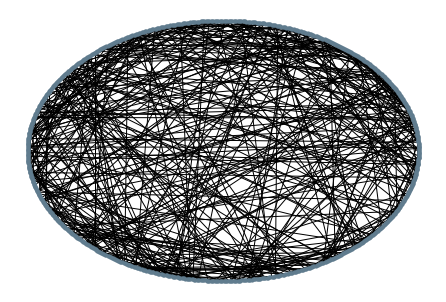

In [17]:
nx.draw_circular(graph,node_size=10,node_color='#607c8e')

Community analysis using Girvan-Newman Algorithm

In [18]:
comp = community.girvan_newman(graph)

In [19]:
communities = list(sorted(c) for c in next(comp))

In [20]:
sorted_communities = sorted(communities,key=len,reverse=True)

In [21]:
communities_distr = [len(x) for x in sorted_communities]

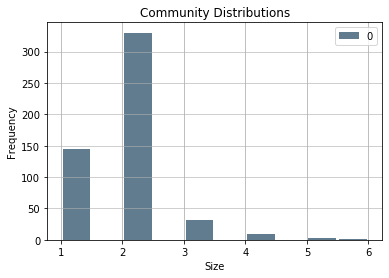

In [22]:
pd.DataFrame(communities_distr).plot.hist(grid=True, rwidth=0.9, color='#607c8e')
plt.title('Community Distributions')
plt.xlabel('Size')
plt.grid(axis='y', alpha=0.75)